In [4]:
import theano
from theano import tensor as T

x1 = T.scalar()
w1 = T.scalar()
w0 = T.scalar()
z1 = w1 * x1 + w0

net_input = theano.function(inputs=[w1, x1, w0], outputs=z1)
print('Net input: {:.2f}'.format(net_input(2.0, 1.0, 0.5)))

Net input: 2.50


In [5]:
print(theano.config.floatX)

float64


In [6]:
theano.config.floatX = 'float32'

In [7]:
print(theano.config.device)

cpu


In [9]:
import numpy as np

x = T.fmatrix(name='x')
x_sum = T.sum(x, axis=0)

calc_sum = theano.function(inputs=[x], outputs=x_sum)

ary = [[1, 2, 3], [1, 2, 3]]
print('column sum :', calc_sum(ary))

column sum : [2. 4. 6.]


In [10]:
ary = np.array([[1, 2, 3], [1, 2, 3]], dtype=theano.config.floatX)
print('column sum : ', calc_sum(ary))

column sum :  [2. 4. 6.]


In [12]:
X = T.fmatrix('x')
w = theano.shared(np.asarray([[0.0, 0.0, 0.0]], dtype=theano.config.floatX))
z = x.dot(w.T)
update = [[w, w + 1.0]]

net_input = theano.function(inputs=[x], updates=update, outputs=z)

data = np.array([[1, 2, 3]], dtype=theano.config.floatX)
for i in range(5):
    print('z{:} : {}'.format(i, net_input(data)))

z0 : [[0.]]
z1 : [[6.]]
z2 : [[12.]]
z3 : [[18.]]
z4 : [[24.]]


In [15]:
data = np.array([[1, 2, 3]], dtype=theano.config.floatX)
x= T.fmatrix('x')
w = theano.shared(np.asarray([[0.0, 0.0, 0.0]], dtype=theano.config.floatX))
z = x.dot(w.T)
update = [[w, w + 1.0]]

net_input = theano.function(inputs=[], updates=update, givens={x: data}, outputs=z)

for i in range(5):
    print('z{}: {}'.format(i, net_input()))

z0: [[0.]]
z1: [[6.]]
z2: [[12.]]
z3: [[18.]]
z4: [[24.]]


In [16]:
X_train = np.asarray([[0.0], [1.0], [2.0], [3.0], [4.0], 
                      [5.0], [6.0], [7.0], [8.0], [9.0]],
                     dtype=theano.config.floatX)
y_train = np.asarray([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0],
                     dtype=theano.config.floatX)

In [20]:
import theano
from theano import tensor as T
import numpy as np

def train_linreg(X_train, y_train, eta, epochs):
    costs = []
    eta0 = T.fscalar('eta0')
    y = T.fvector(name='y')
    X = T.fmatrix(name='X')
    
    w = theano.shared(np.zeros(shape=(X_train.shape[1] + 1), dtype=theano.config.floatX), 
                      name='w')
    net_input = T.dot(X, w[1:]) + w[0]
    errors = y - net_input
    cost = T.sum(T.pow(errors, 2))
    
    gradient = T.grad(cost, wrt=w)
    update = [(w, w - eta0 * gradient)]
    
    train = theano.function(inputs=[eta0], 
                            outputs=cost,
                            updates=update,
                            givens={X: X_train, y: y_train})
    
    for _ in range(epochs):
        costs.append(train(eta))
        
    return costs, w

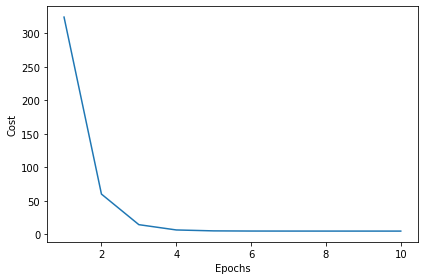

In [21]:
import matplotlib.pyplot as plt

costs, w = train_linreg(X_train, y_train, eta=0.001, epochs=10)
plt.plot(range(1, len(costs) + 1), costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()

In [24]:
def predict_linreg(X, w):
    Xt = T.matrix(name='X')
    net_input = T.dot(Xt, w[1:]) + w[0]
    predict = theano.function(inputs=[Xt], givens={w: w}, outputs=net_input)
    return predict(X)

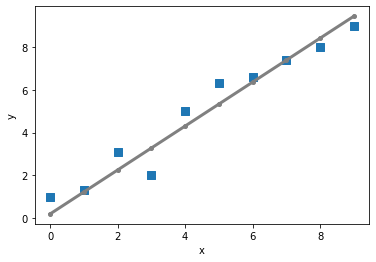

In [25]:
plt.scatter(X_train, y_train, marker='s', s=50)
plt.plot(range(X_train.shape[0]),
         predict_linreg(X_train, w),
         color='gray',
         marker='o',
         markersize=4,
         linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()